In [83]:
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt

In [150]:
o3 = ndimage.imread('Kids_DrawA_Otter3.jpg')

In [12]:
o3.shape

(362, 405, 3)

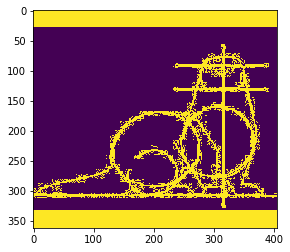

In [30]:
plt.imshow(o3.sum(2) <= 254*3)
plt.show()

In [31]:
o3_not0 = o3_sum(2) <= 254*3

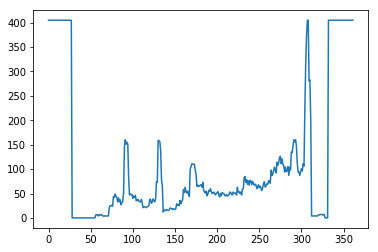

In [44]:
plt.plot(o3_not0.sum(1))
plt.show()

In [57]:
if_crop_d1 = []
for i, v in enumerate(o3_not0.sum(1)):
    if 50 < i < 330:
        if_crop_d1.append(False)
    elif v > 399:
        if_crop_d1.append(True)
    else:
        if_crop_d1.append(False)

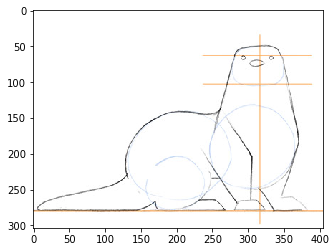

In [151]:
o3_cropped = o3[np.invert(np.array(if_crop_d1)), :, :]
plt.imshow(o3_cropped)
plt.show()

## Make white transparent

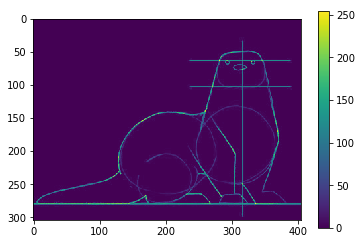

In [168]:
m = np.min(o3_cropped, 2)
alpha = 1 - m/255

def div0( a, b ):
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.floor_divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
    return c

new_rgb = div0((o3_cropped - m[:,:,np.newaxis]), alpha[:,:,np.newaxis])
plt.imshow(alpha*255)
plt.colorbar()
plt.show()

In [169]:
o3_trans = np.dstack((new_rgb, 255*alpha))

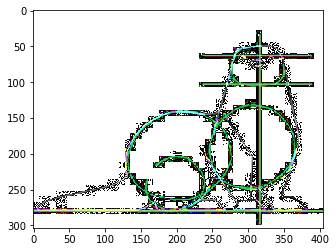

In [170]:
plt.imshow(o3_trans)
plt.show()

In [171]:
imsave('o3.png', o3_trans)